In [ ]:
"""
Installation(Development version)
------------
Recommendations for installing the package.
Use python==3.11 (have not tested with other versions).
git clone https://github.com/justin-herry/spatialdata_notebook.git
cd spatialdata_notebook
pip install -e .
"""
"""
In addition, you can also directly install the package from PyPI.
    pip install spatialdata
    pip install "spatialdata[extra]"
    (test: python -c "import spatialdata; print(spatialdata.__path__)"
    you will see the output:
    /home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
    warnings.warn(
    /home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
    from pkg_resources import DistributionNotFound, get_distribution
    ['/home/zelin_zang/word_language_model/siheng/scFoundation/datasets/spatialdata/src/spatialdata']
    )
    pip install "spatialdata[torch]"
"""
# Now let's start using the package!



'\nIn addition, you can also directly install the package from PyPI.\n    pip install spatialdata\n    pip install "spatialdata[extra]"\n    (test: python -c "import spatialdata; print(spatialdata.__path__)"\n    you will see the output:\n    /home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.\n    warnings.warn(\n    /home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.\n    from pkg_resources import Di

In [38]:
#  wget https://s3.embl.de/spatialdata/spatialdata-sandbox/mouse_liver.zip   get a sample dataset
#  unzip mouse_liver.zip
import spatialdata as sd
import spatialdata_plot # like scanpy

data_path = "/home/zelin_zang/word_language_model/siheng/scFoundation/datasets/spatialdata/data.zarr" # path to the sample dataset
sdata = sd.read_zarr(data_path)
sdata

# you will see the the format of the dataset, cantains multiple modalities, e.g., Images,Labels, Points, Shapes, etc.

/tmp/ipykernel_3061628/1535486098.py:7: UserWarning: SpatialData is not stored in the most current format. If you want to use Zarr v3, please write the store to a new location using `sdata.write()`.
  sdata = sd.read_zarr(data_path)
no parent found for <ome_zarr.reader.Label object at 0x7f7034231e90>: None


/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/zarr/core/group.py:3530: ZarrUserWarning: Object at zmetadata is not recognized as a component of a Zarr hierarchy.
  warnings.warn(


SpatialData object, with associated Zarr store: /home/zelin_zang/word_language_model/siheng/scFoundation/datasets/spatialdata/data.zarr
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 6432, 6432), (1, 1608, 1608)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (6432, 6432)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3375, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (3375, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

In [39]:
# we can use keywords to access different modalities
sdata["raw_image"]  # 2D array cyx  3D array czxy     c repesents channels
# y, x represents different scales in 2D
# z, y, x represents different scales in 3D

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (c: 1, y: 6432, x: 6432)
│       Coordinates:
│         * c        (c) int64 8B 0
│         * y        (y) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
│         * x        (x) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
│       Data variables:
│           image    (c, y, x) uint16 83MB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
└── Group: /scale1
        Dimensions:  (c: 1, y: 1608, x: 1608)
        Coordinates:
          * c        (c) int64 8B 0
          * y        (y) float64 13kB 2.0 6.0 10.0 14.0 ... 6.422e+03 6.426e+03 6.43e+03
          * x        (x) float64 13kB 2.0 6.0 10.0 14.0 ... 6.422e+03 6.426e+03 6.43e+03
        Data variables:
            image    (c, y, x) uint16 5MB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>

In [40]:
sd.get_pyramid_levels(sdata["raw_image"], n=0)   # get different scales of the image pyramid, n=0 is the highest resolution

# """
# You can also konw the avaliable level

# """
# import xarray as xr
# tree = sdata["raw_image"]
# print("avaliable level:", list(tree.children.keys()))

<xarray.DataArray 'image' (c: 1, y: 6432, x: 6432)> Size: 83MB
dask.array<from-zarr, shape=(1, 6432, 6432), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 8B 0
  * y        (y) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
  * x        (x) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
Attributes:
    transform:  {'global': Identity }

In [41]:
# image properties
sd.models.get_axes_names(sdata["raw_image"])

('c', 'y', 'x')

In [42]:
# this simple data only have a DAPI(DAPI is a fluorescent dye widely used in biomedical research)
sd.models.get_channel_names(sdata["raw_image"])

[0]

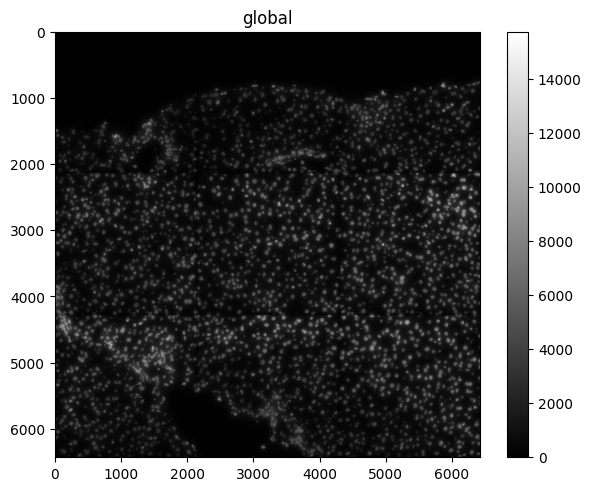

In [43]:
# Visualization
sdata.pl.render_images("raw_image", cmap="gray").pl.show()

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:88: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


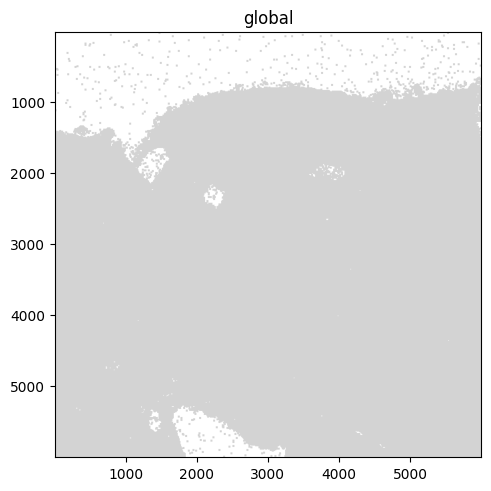

In [44]:
sdata["transcripts"]    #different between pandas(Dask DataFrame and pandas DataFrame)

# Load into memory
sdata["transcripts"].compute()

# Visualization
sdata.pl.render_points("transcripts").pl.show()


In [45]:
"""
First one shows what the tissue looks like (cell nuclei image)

Second one shows where genes are expressed (mRNA molecule locations)

"""

'\nFirst one shows what the tissue looks like (cell nuclei image)\n\nSecond one shows where genes are expressed (mRNA molecule locations)\n\n'

number of genes: 100
Gene examples: ['Acta2', 'Adamtsl2', 'Adgre1', 'Adgrg6', 'Atp6v0d2', 'Axl', 'C5ar1', 'Ccr2', 'Ccr7', 'Cd14', 'Cd19', 'Cd207', 'Cd209a', 'Cd36', 'Cd3e', 'Cd5l', 'Cd79a', 'Cd9', 'Chil3', 'Clec10a', 'Clec4f', 'Clec9a', 'Clic5', 'Col1a1', 'Colec11', 'Cox6a2', 'Cx3cr1', 'Cxcl12', 'Cyp2e1', 'Dcn', 'Des', 'Dpt', 'Epcam', 'F13a1', 'Fcgr1', 'Flt3', 'Flt4', 'Fn1', 'Folr2', 'Gdf15', 'Ghr', 'Gja5', 'Gls2', 'Glul', 'Gpnmb', 'Grip1', 'Hal', 'Hgf', 'Igfbp3', 'Itgae', 'Itgax', 'Itgb7', 'Krt19', 'Lgr5', 'Lhx6', 'Lilra5', 'Lpl', 'Lyve1', 'Mafb', 'Marco', 'Mfap4', 'Mgl2', 'Mmp12', 'Mmrn1', 'Ms4a7', 'Msln', 'Myh11', 'Ncam1', 'Ngfr', 'Nrxn1', 'Olfml3', 'Pck1', 'Pdgfra', 'Pdgfrb', 'Pecam1', 'Plpp1', 'Prox1', 'Reln', 'Rspo3', 'Sds', 'Sept3', 'Siglech', 'Sirpa', 'Slc40a1', 'Sox9', 'Spn', 'Spon2', 'Spp1', 'Stab2', 'Svep1', 'Timd4', 'Tmem119', 'Trem2', 'Upk3b', 'Vsig4', 'Vwf', 'Wnt2', 'Wnt9b', 'Wt1', 'Xcr1']


/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:88: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:821: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax

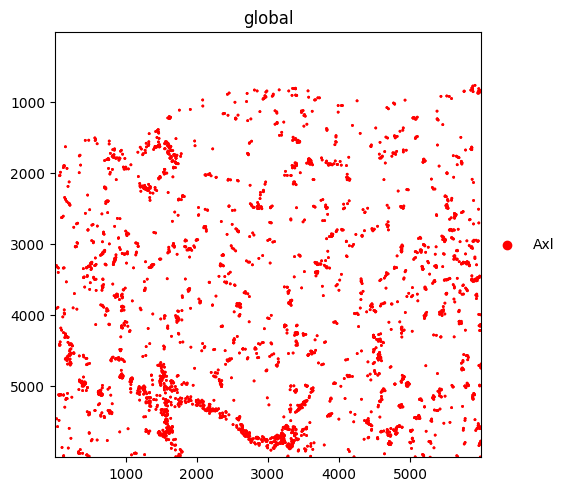

In [46]:
"""
Check the number of genes and gene names in the dataset and visualize the expression of a specific gene (Axl in this case).
"""
unique_genes = sdata["transcripts"]["gene"].unique().compute()
print(f"number of genes: {len(unique_genes)}")
print("Gene examples:", sorted(unique_genes))
sdata.pl.render_points("transcripts", color="gene", groups="Axl", palette="red").pl.show()

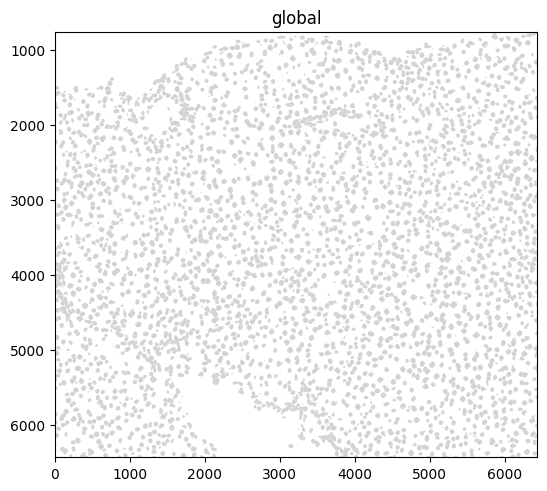

In [49]:
sdata["nucleus_boundaries"]
sdata.pl.render_shapes("nucleus_boundaries").pl.show()

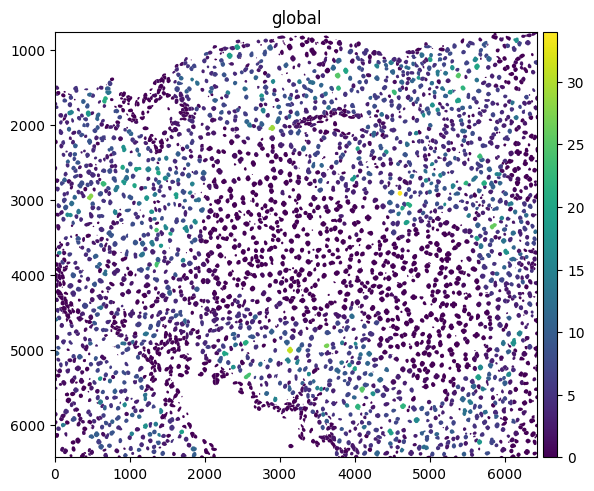

In [ ]:
# expression matrix
sdata["table"]
# Visualizing the expression levels of specific genes in cells
sdata.pl.render_shapes("nucleus_boundaries", color="Hal").pl.show()

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


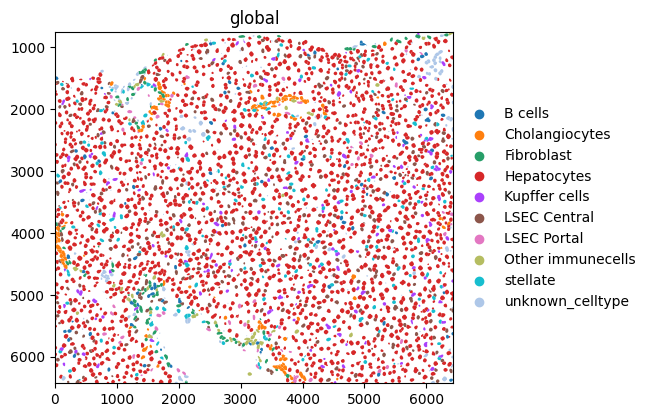

In [52]:
sdata.pl.render_shapes("nucleus_boundaries", color="annotation").pl.show()

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:88: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  return fn(*args_all, **kw)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprec

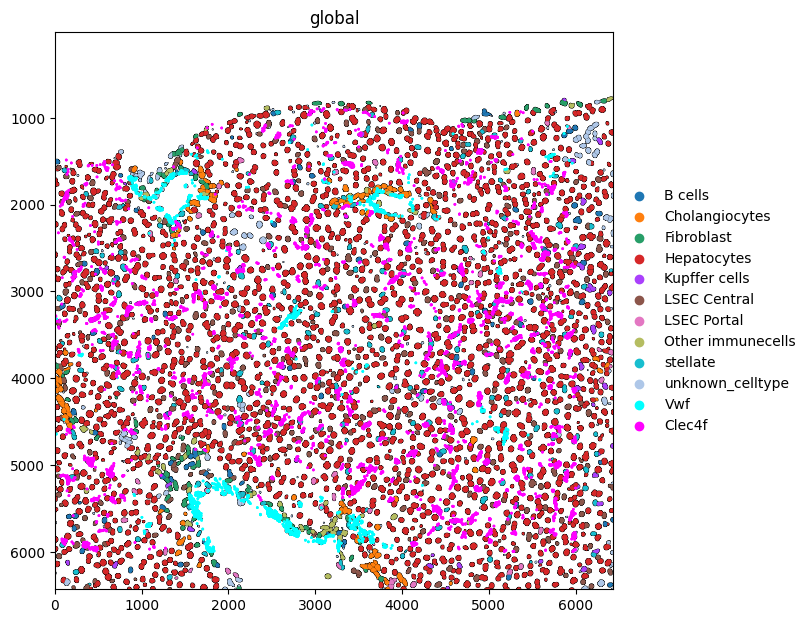

In [53]:
(
    sdata.pl.render_shapes(
        "nucleus_boundaries",
        color="annotation",
        outline_alpha=1.0,
        outline_width=0.5,
    )
    .pl.render_points(
        "transcripts",
        color="gene",
        groups="Vwf",
        palette="cyan",
    )
    .pl.render_points(
        "transcripts",
        color="gene",
        groups="Clec4f",
        palette="magenta",
    )
    .pl.show(figsize=(8, 8))
)

In [ ]:
# Data pruning
sd.get_extent(sdata)
crop_sdata1 = sd.bounding_box_query(
    sdata, axes=("y", "x"), min_coordinate=[1000, 1000], max_coordinate=[2000, 2000], target_coordinate_system="global"
)
crop_sdata1

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/functools.py:909: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


SpatialData object
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 1000, 1000), (1, 250, 250)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (1000, 1000)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (96, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (96, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


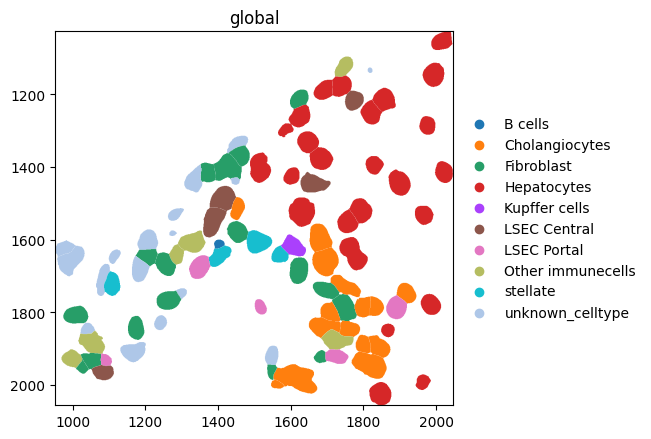

In [56]:
# Visualizing the pruned data
crop_sdata1.pl.render_shapes("nucleus_boundaries", color="annotation").pl.show()

In [58]:
# Clip data using a polygon area

from shapely import Polygon

polygon = Polygon([(1000, 1000), (1500, 1000), (2000, 1500), (1500, 2000)])
crop_sdata2 = sd.polygon_query(sdata, polygon, target_coordinate_system="global")
crop_sdata2

SpatialData object
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 1000, 1000), (1, 250, 250)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (1000, 1000)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (45, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (45, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

/home/zelin_zang/miniconda3/envs/siheng/lib/python3.11/site-packages/spatialdata_plot/pl/utils.py:872: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


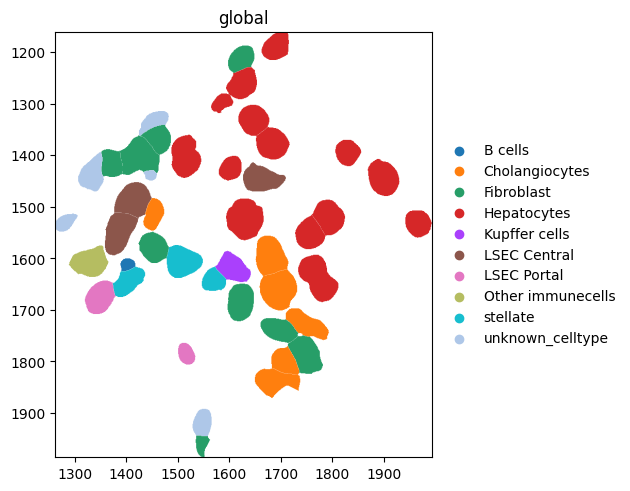

In [59]:
# Visualizing the pruned data
crop_sdata2.pl.render_shapes("nucleus_boundaries", color="annotation").pl.show()